In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import classification_report
import tensorflow as tf

## Preparing Data

In [2]:
(X_train, Y_train),(X_test,Y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [4]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

## Building Neural Network

In [5]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
epochs=15
model.fit(X_train,Y_train,epochs=epochs)

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2766 - accuracy: 0.9194
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1233 - accuracy: 0.9629
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0910 - accuracy: 0.9721
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0707 - accuracy: 0.9782
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0575 - accuracy: 0.9822
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0499 - accuracy: 0.9841
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0422 - accuracy: 0.9867
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0351 - accuracy: 0.9883
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0296 - accuracy: 0.9903
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.02

In [8]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1168 - accuracy: 0.9759


[0.11678425222635269, 0.9758999943733215]

## Prediction For Test Data

<function matplotlib.pyplot.show(close=None, block=None)>

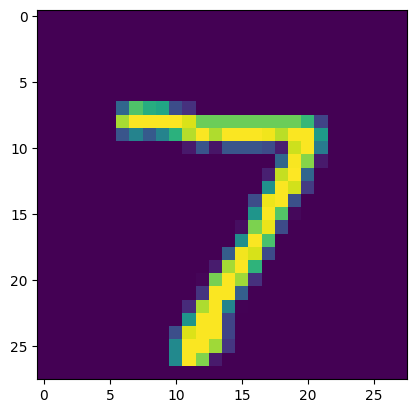

In [9]:
plt.imshow(X_test[0])              #printing any image from test dataset
plt.show

In [10]:
Y_pred=model.predict(X_test)
print(Y_pred[0])

313/313 [==============================] - 0s 1ms/step
[2.5763303e-10 1.4066495e-09 8.6591363e-08 5.4321654e-06 7.6955881e-12
 2.0675817e-11 3.3864956e-18 9.9999434e-01 7.6187018e-10 8.2272340e-09]


In [11]:
label1=np.argmax(Y_pred[0])
print("Prediction label",label1)
print("Actual label",Y_test[0])


Prediction label 7
Actual label 7


In [12]:
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(classification_report(Y_test,Y_pred_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.95      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Predictive System

In [13]:
image_path='Images/pred_img3.png'                 #change the image path to test your custom image
image=cv2.imread(image_path)
type(image)

numpy.ndarray

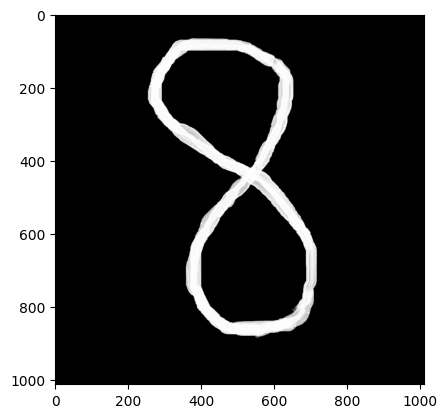

In [14]:
plt.imshow(image)

In [15]:
gray_img=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
gray_img.shape

(1012, 1012)

In [16]:
resize_img=cv2.resize(gray_img,(28,28))
resize_img.shape

(28, 28)

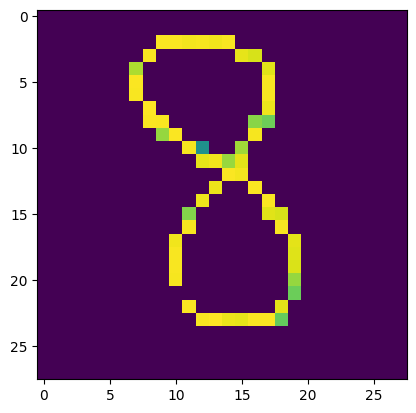

In [17]:
plt.imshow(resize_img)

In [18]:
test_img = resize_img.astype("float32") / 255
test_img=np.reshape(test_img,[1,28,28])

In [19]:
input_pred=model.predict(test_img)
print(input_pred)

1/1 [==============================] - 0s 19ms/step
[[5.6584468e-06 2.2227211e-01 6.9919792e-03 4.0009079e-04 1.6402949e-01
  3.1040276e-05 2.4102090e-03 2.1057833e-05 6.0383832e-01 1.8183140e-10]]


In [20]:
print("Prediction:",np.argmax(input_pred))

Prediction: 8
